In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
data_f = pd.read_csv('COVID_Tracer.csv')
data_f.head(10)

,COVID
0,12300
1,10000
2,29654
3,8900
4,8200
5,25000
6,8000
7,25000
8,9889
9,12500


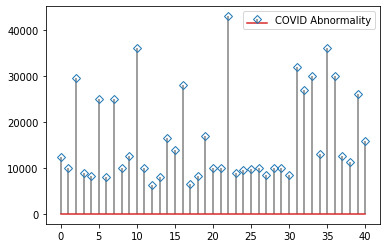

In [3]:
# x, y points for the graph
x=np.arange(0, len(data_f)-1)
y=data_f[:-1]

markerline, stemlines, baseline = plt.stem(x, y, linefmt ='grey', markerfmt ='D', bottom = 1.1, use_line_collection = True, label='COVID Abnormality')
markerline.set_markerfacecolor('none')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Define Model
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float=0.02,max_features=1.0,
                     random_state=None, verbose=0, warm_start=False)
model.fit(data_f[['COVID']])

SyntaxError: invalid syntax (<ipython-input-17-5f2bfb3e6c5f>, line 2)

In [18]:
data_f['scores']=model.decision_function(data_f[['COVID']])
data_f['anomaly']=model.predict(data_f[['COVID']])
data_f.head(40)

,COVID,scores,anomaly
0,12300,0.042384,1
1,10000,0.138423,1
2,29654,-0.040867,-1
3,8900,0.071966,1
4,8200,0.061082,1
5,25000,-0.004941,-1
6,8000,0.034871,1
7,25000,-0.004941,-1
8,9889,0.122116,1
9,12500,0.058941,1


In [19]:
# display only those that are suspects
anomaly=data_f.loc[data_f['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

    COVID    scores  anomaly
2   29654 -0.040867       -1
5   25000 -0.004941       -1
7   25000 -0.004941       -1
10  36000 -0.114913       -1
12   6200 -0.104310       -1
14  16500 -0.003159       -1
16  28123 -0.048227       -1
17   6400 -0.092113       -1
19  17000 -0.026874       -1
22  43000 -0.276441       -1
31  32000 -0.113743       -1
32  27000 -0.031099       -1
33  30000 -0.002784       -1
35  36000 -0.114913       -1
36  30000 -0.002784       -1
39  26000 -0.026122       -1
40  15901 -0.008826       -1
41  23000 -0.093978       -1


In [20]:
COVID_INDEX_LIMIT = 29999
outliers_counter = len(data_f[data_f['COVID'] > COVID_INDEX_LIMIT])
outliers_counter

6

In [21]:
print("Accuracy percentage:", 100*list(data_f['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 300.0


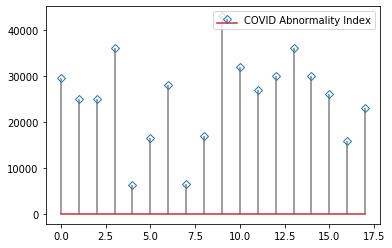

In [22]:
# x, y points for the graph
x=np.arange(0, len(anomaly))
y=anomaly['COVID']

markerline, stemlines, baseline = plt.stem(x, y, linefmt ='grey', markerfmt ='D', bottom = 1.1, use_line_collection = True, label='COVID Abnormality Index')
markerline.set_markerfacecolor('none')
plt.legend(loc='upper right')
plt.show()